In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Dataset/Salary_Data.csv')

Viewing the top 5 rows, we can see how the data will be arranged


In [ ]:
X=dataset.iloc[:,[0]].values
y=dataset.iloc[:,[1]].values

In [ ]:
y

array([[ 39343],
       [ 46205],
       [ 37731],
       [ 43525],
       [ 39891],
       [ 56642],
       [ 60150],
       [ 54445],
       [ 64445],
       [ 57189],
       [ 63218],
       [ 55794],
       [ 56957],
       [ 57081],
       [ 61111],
       [ 67938],
       [ 66029],
       [ 83088],
       [ 81363],
       [ 93940],
       [ 91738],
       [ 98273],
       [101302],
       [113812],
       [109431],
       [105582],
       [116969],
       [112635],
       [122391],
       [121872]])

In [ ]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc = MinMaxScaler()

X= sc.fit_transform(X)
y= sc.fit_transform(y)

Next, we separate the data into a training set and testing sets:


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.20, random_state = 0)

Model Architecture


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot as plt

Define the keras model


In [ ]:
model = Sequential()
model.add(Dense(16,input_dim=1, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='linear'))
#compile the keras model
model.compile(loss='MSE', optimizer='adam', metrics=['MAE'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y.shape


(30, 1)

In [ ]:
History = model.fit(X_train,y_train,epochs=50,batch_size=3)

Epoch 1/50
8/8 [==============================] - 1s 2ms/step - loss: 0.2189 - MAE: 0.3824
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1924 - MAE: 0.3517
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: 0.1695 - MAE: 0.3251
Epoch 4/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1450 - MAE: 0.2995
Epoch 5/50
8/8 [==============================] - 0s 3ms/step - loss: 0.1267 - MAE: 0.2764
Epoch 6/50
8/8 [==============================] - 0s 3ms/step - loss: 0.1102 - MAE: 0.2548
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0960 - MAE: 0.2320
Epoch 8/50
8/8 [==============================] - 0s 3ms/step - loss: 0.0793 - MAE: 0.2087
Epoch 9/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0683 - MAE: 0.1956
Epoch 10/50
8/8 [==============================] - 0s 3ms/step - loss: 0.0579 - MAE: 0.1812
Epoch 11/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0503 - MAE: 0.17

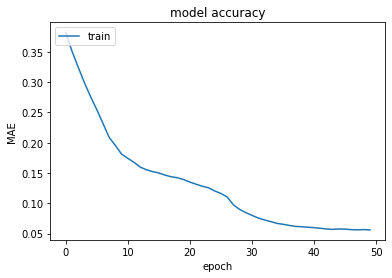

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plot for Training and Validation accuracy
from matplotlib import pyplot as plt
plt.plot(History.history ['MAE'])
plt.title('model accuracy')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')

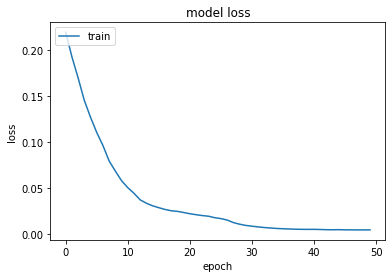

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plot for training loss
plt.plot(History.history ['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('loss_curve.png')

In [ ]:
history_test = model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 159ms/step - loss: 0.0022 - MAE: 0.0393


In [ ]:
history_test

[0.0021793015766888857, 0.039261624217033386]